In [1]:
using Pkg
Pkg.activate(".")
Pkg.add("Plots")

# The package Interact only starts properly when the notebook() is started via the IJulia in the Julia REPL!!
Pkg.add("Interact")

Pkg.update()

using Plots
using Interact

  Activating project at `~/Documents/GitHub/Phys215-202324-2/00-Intro`


   Resolving package versions...


  No Changes to `~/Documents/GitHub/Phys215-202324-2/00-Intro/Project.toml`
  No Changes to `~/Documents/GitHub/Phys215-202324-2/00-Intro/Manifest.toml`


   Resolving package versions...


  No Changes to `~/Documents/GitHub/Phys215-202324-2/00-Intro/Project.toml`
  No Changes to `~/Documents/GitHub/Phys215-202324-2/00-Intro/Manifest.toml`


    Updating registry at `~/.julia/registries/General.toml`


    Updating git-repo `https://github.com/BenLauwens/ThinkJulia.jl`


  No Changes to `~/Documents/GitHub/Phys215-202324-2/00-Intro/Project.toml`
  No Changes to `~/Documents/GitHub/Phys215-202324-2/00-Intro/Manifest.toml`


# Exploring Julia with Mandelbrot set

The Mandelbrot set is the set of complex numbers $c=x+iy$ such that the successive application of the following operations from $z = 0$ do not proceed to infinity.
$$z \leftarrow z + c$$
The way to implement this is to ensure that the $|z| < 2$ after some finite iterations.

In [2]:
function mandel( c )
    z = c
    itrMax = 80
    for n in 1:itrMax
        if abs(z) > 2
            return n-1
        end
        z = z^2 + c
    end
    return itrMax
end

mandel (generic function with 1 method)

In [3]:
"""
Plots the results of `mandel()` function
"""
function plotMandel( xrange::Tuple{Float64,Float64}, yrange::Tuple{Float64,Float64}; n=100 )
    M = rand(n,n);
    xval = range(xrange[1],xrange[2]; length=n );
    yval = range(yrange[1],yrange[2]; length=n );
    for i in 1:n, j in 1:n
        M[i,j] = mandel( xval[i] + im*yval[j]  )
    end
    
    heatmap( M, c=:thermal
        ,aspect_ratio=1.0
#        ,xaxis=nothing
#        ,yaxis=nothing
        ,key=:none
    )
end

plotMandel

In [4]:
plotMandel( vrange::Tuple{Float64,Float64}; n=100 ) = plotMandel( vrange, vrange; n )

plotMandel (generic function with 2 methods)

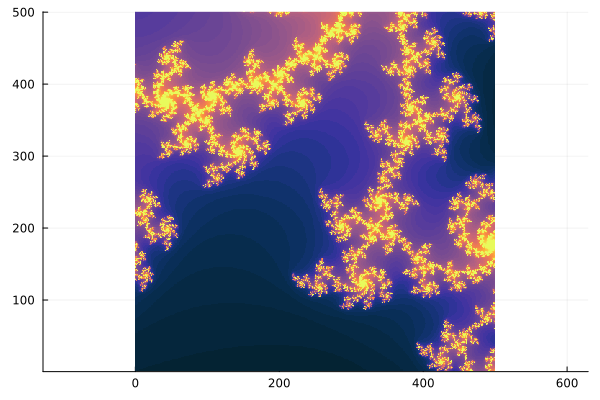

In [11]:
plotMandel( (0.373, 0.374), n=500 )

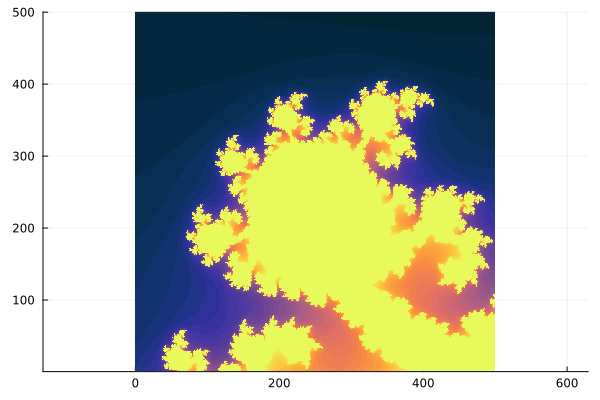

In [6]:
plotMandel( (0.352, 0.353), n=500 )

In [9]:
Pkg.add("Conda")
using Conda
Conda.pip_interop(true)
Conda.pip("install", "webio_jupyter_extension")

   Resolving package versions...


    Updating `~/Documents/GitHub/Phys215-202324-2/00-Intro/Project.toml`


  [8f4d0f93] + Conda v1.10.0
    Updating `~/Documents/GitHub/Phys215-202324-2/00-Intro/Manifest.toml`
 

 [8f4d0f93] + Conda v1.10.0
  [81def892] + VersionParsing v1.3.0


┌ Info: Downloading miniconda installer ...
└ @ Conda /Users/johnrob/.julia/packages/Conda/sDjAP/src/Conda.jl:289


┌ Info: Installing miniconda ...
└ @ Conda /Users/johnrob/.julia/packages/Conda/sDjAP/src/Conda.jl:300


PREFIX=/Users/johnrob/.julia/conda/3/x86_64


Unpacking payload ...


Extracting bzip2-1.0.8-h10d778d_5.conda


Extracting c-ares-1.24.0-h10d778d_0.conda
Extracting ca-certificates-2023.11.17-h8857fd0_0.conda
Extracting icu-73.2-hf5e326d_0.conda


Extracting libcxx-16.0.6-hd57cbcb_0.conda


Extracting libev-4.33-h10d778d_2.conda
Extracting libffi-3.4.2-h0d85af4_5.tar.bz2


Extracting libiconv-1.17-hd75f5a5_2.conda
Extracting libzlib-1.2.13-h8a1eda9_5.conda
Extracting lzo-2.10-haf1e3a3_1000.tar.bz2
Extracting ncurses-6.4-h93d8f39_2.conda


Extracting pybind11-abi-4-hd8ed1ab_3.tar.bz2


Extracting python_abi-3.10-4_cp310.conda
Extracting reproc-14.2.4.post0-h10d778d_1.conda
Extracting tzdata-2023c-h71feb2d_0.conda


Extracting xz-5.2.6-h775f41a_0.tar.bz2
Extracting fmt-10.1.1-he51d815_1.conda


Extracting libedit-3.1.20191231-h0678c8f_2.tar.bz2
Extracting libsolv-0.7.27-hf4d7fad_0.conda
Extracting libsqlite-3.44.2-h92b6c6a_0.conda
Extracting libxml2-2.12.3-hc0ae0f7_0.conda


Extracting lz4-c-1.9.4-hf0c8a7f_0.conda
Extracting openssl-3.2.0-hd75f5a5_1.conda


Extracting readline-8.2-h9e318b2_1.conda
Extracting reproc-cpp-14.2.4.post0-h93d8f39_1.conda
Extracting tk-8.6.13-h1abcd95_1.conda


Extracting yaml-cpp-0.8.0-he965462_0.conda
Extracting zstd-1.5.5-h829000d_0.conda
Extracting krb5-1.21.2-hb884880_0.conda


Extracting libarchive-3.7.2-hd35d340_1.conda
Extracting libnghttp2-1.58.0-h64cf6d3_1.conda


Extracting libssh2-1.11.0-hd019ec5_0.conda


Extracting python-3.10.13-h00d2728_0_cpython.conda


Extracting archspec-0.2.2-pyhd8ed1ab_0.conda
Extracting boltons-23.1.1-pyhd8ed1ab_0.conda


Extracting brotli-python-1.1.0-py310h9e9d8ca_1.conda
Extracting certifi-2023.11.17-pyhd8ed1ab_0.conda
Extracting charset-normalizer-3.3.2-pyhd8ed1ab_0.conda
Extracting colorama-0.4.6-pyhd8ed1ab_0.tar.bz2
Extracting distro-1.8.0-pyhd8ed1ab_0.conda


Extracting idna-3.6-pyhd8ed1ab_0.conda
Extracting jsonpointer-2.4-py310h2ec42d9_3.conda
Extracting libcurl-8.5.0-h726d00d_0.conda
Extracting menuinst-2.0.1-py310h2ec42d9_0.conda


Extracting packaging-23.2-pyhd8ed1ab_0.conda
Extracting platformdirs-4.1.0-pyhd8ed1ab_0.conda
Extracting pluggy-1.3.0-pyhd8ed1ab_0.conda
Extracting pycosat-0.6.6-py310h6729b98_0.conda
Extracting pycparser-2.21-pyhd8ed1ab_0.tar.bz2


Extracting pysocks-1.7.1-pyha2e5f31_6.tar.bz2
Extracting ruamel.yaml.clib-0.2.7-py310h6729b98_2.conda
Extracting setuptools-68.2.2-pyhd8ed1ab_0.conda


Extracting truststore-0.8.0-pyhd8ed1ab_0.conda
Extracting wheel-0.42.0-pyhd8ed1ab_0.conda
Extracting cffi-1.16.0-py310hdca579f_0.conda
Extracting jsonpatch-1.33-pyhd8ed1ab_0.conda
Extracting libmamba-1.5.5-hb976dfd_0.conda


Extracting pip-23.3.2-pyhd8ed1ab_0.conda


Extracting ruamel.yaml-0.18.5-py310hb372a2b_0.conda
Extracting tqdm-4.66.1-pyhd8ed1ab_0.conda
Extracting urllib3-2.1.0-pyhd8ed1ab_0.conda


Extracting libmambapy-1.5.5-py310hd068509_0.conda
Extracting requests-2.31.0-pyhd8ed1ab_0.conda
Extracting zstandard-0.22.0-py310hd88f66e_0.conda
Extracting conda-package-streaming-0.9.0-pyhd8ed1ab_0.conda
Extracting conda-package-handling-2.2.0-pyh38be061_0.conda
Extracting conda-libmamba-solver-23.12.0-pyhd8ed1ab_0.conda
Extracting conda-23.11.0-py310h2ec42d9_1.conda


Extracting mamba-1.5.5-py310h6bde348_0.conda

Installing base environment...


                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/



Transaction

  Prefix: /Users/johnrob/.julia/conda/3/x86_64

  Updating specs:

   - conda-forge/osx-64::bzip2==1.0.8=h10d778d_5[md5=6097a6ca9ada32699b5fc4312dd6ef18]
   - conda-forge/osx-64::c-ares==1.24.0=h10d778d_0[md5=5ae247d8280a4581501ffe619b4a438e]
   - conda-forge/osx-64::ca-certificates==2023.11.17=h8857fd0_0[md5=c687e9d14c49e3d3946d50a413cdbf16]
   - conda-forge/osx-64::icu==73.2=hf5e326d_0[md5=5cc301d759ec03f28328428e28f65591]
   - conda-forge/osx-64::libcxx==16.0.6=hd57cbcb_0[md5=7d6972792161077908b62971802f289a]
   - conda-forge/osx-64::libev==4.33=h10d778d_2[md5=899db79329439820b7e8f8de41bca902]
   - conda-forge/osx-64::libffi==3.4.2=h0d85af4_5[md5=ccb34fb14960ad8b125962d3d79b31a9]
   - conda-forge/osx-64::libiconv==1.17=hd75f5a5_2[md5=6c3628d047e151efba7cf08c5e54d1ca]
   - conda-forge/osx-64::libzlib==1.2.13=h8a1eda9_5[md5=4a3ad23f6e16f99c04e166767193d700]
   - conda-forge/osx-64::lzo==2.10=haf1e3a3_1000[md5=0b6bca372a95d6c602c7a922e928ce79]
   - conda-forge/osx-64::ncur

  Package                         Version  Build               Channel           Size
───────────────────────────────────────────────────────────────────────────────────────
  Install:
───────────────────────────────────────────────────────────────────────────────────────

  + archspec                        0.2.2  pyhd8ed1ab_0        conda-forge     Cached
  + boltons                        23.1.1  pyhd8ed1ab_0        conda-forge     Cached
  + brotli-python                   1.1.0  py310h9e9d8ca_1     conda-forge     Cached
  + bzip2                           1.0.8  h10d778d_5          conda-forge     Cached
  + c-ares                         1.24.0  h10d778d_0          conda-forge     Cached
  + ca-certificates            2023.11.17  h8857fd0_0          conda-forge     Cached
  + certifi                    2023.11.17  pyhd8ed1ab_0        conda-forge     Cached
  + cffi                           1.16.0  py310hdca579f_0     conda-forge     Cached
  + charset-normalizer              3.

Linking ca-certificates-2023.11.17-h8857fd0_0
Linking icu-73.2-hf5e326d_0


Linking libcxx-16.0.6-hd57cbcb_0


Linking libev-4.33-h10d778d_2
Linking libffi-3.4.2-h0d85af4_5
Linking libiconv-1.17-hd75f5a5_2
Linking libzlib-1.2.13-h8a1eda9_5
Linking lzo-2.10-haf1e3a3_1000
Linking ncurses-6.4-h93d8f39_2


Linking pybind11-abi-4-hd8ed1ab_3
Linking python_abi-3.10-4_cp310
Linking reproc-14.2.4.post0-h10d778d_1


Linking tzdata-2023c-h71feb2d_0


Linking xz-5.2.6-h775f41a_0


Linking fmt-10.1.1-he51d815_1
Linking libedit-3.1.20191231-h0678c8f_2
Linking libsolv-0.7.27-hf4d7fad_0


Linking libsqlite-3.44.2-h92b6c6a_0
Linking libxml2-2.12.3-hc0ae0f7_0
Linking lz4-c-1.9.4-hf0c8a7f_0
Linking openssl-3.2.0-hd75f5a5_1


Linking readline-8.2-h9e318b2_1
Linking reproc-cpp-14.2.4.post0-h93d8f39_1
Linking tk-8.6.13-h1abcd95_1


Linking yaml-cpp-0.8.0-he965462_0
Linking zstd-1.5.5-h829000d_0
Linking krb5-1.21.2-hb884880_0


Linking libarchive-3.7.2-hd35d340_1


Linking libnghttp2-1.58.0-h64cf6d3_1
Linking libssh2-1.11.0-hd019ec5_0


Linking python-3.10.13-h00d2728_0_cpython


Linking archspec-0.2.2-pyhd8ed1ab_0


Linking boltons-23.1.1-pyhd8ed1ab_0
Linking brotli-python-1.1.0-py310h9e9d8ca_1
Linking certifi-2023.11.17-pyhd8ed1ab_0


Linking charset-normalizer-3.3.2-pyhd8ed1ab_0
Linking colorama-0.4.6-pyhd8ed1ab_0
Linking distro-1.8.0-pyhd8ed1ab_0
Linking idna-3.6-pyhd8ed1ab_0
Linking jsonpointer-2.4-py310h2ec42d9_3
Linking libcurl-8.5.0-h726d00d_0


Linking menuinst-2.0.1-py310h2ec42d9_0
Linking packaging-23.2-pyhd8ed1ab_0
Linking platformdirs-4.1.0-pyhd8ed1ab_0


Linking pluggy-1.3.0-pyhd8ed1ab_0
Linking pycosat-0.6.6-py310h6729b98_0
Linking pycparser-2.21-pyhd8ed1ab_0


Linking pysocks-1.7.1-pyha2e5f31_6
Linking ruamel.yaml.clib-0.2.7-py310h6729b98_2
Linking setuptools-68.2.2-pyhd8ed1ab_0


Linking truststore-0.8.0-pyhd8ed1ab_0


Linking wheel-0.42.0-pyhd8ed1ab_0
Linking cffi-1.16.0-py310hdca579f_0
Linking jsonpatch-1.33-pyhd8ed1ab_0
Linking libmamba-1.5.5-hb976dfd_0


Linking pip-23.3.2-pyhd8ed1ab_0


Linking ruamel.yaml-0.18.5-py310hb372a2b_0


Linking tqdm-4.66.1-pyhd8ed1ab_0
Linking urllib3-2.1.0-pyhd8ed1ab_0


Linking libmambapy-1.5.5-py310hd068509_0
Linking requests-2.31.0-pyhd8ed1ab_0
Linking zstandard-0.22.0-py310hd88f66e_0
Linking conda-package-streaming-0.9.0-pyhd8ed1ab_0
Linking conda-package-handling-2.2.0-pyh38be061_0


Linking conda-libmamba-solver-23.12.0-pyhd8ed1ab_0
Linking conda-23.11.0-py310h2ec42d9_1


Linking mamba-1.5.5-py310h6bde348_0


Transaction finished


installation finished.


┌ Info: Running `conda config --set pip_interop_enabled true --file /Users/johnrob/.julia/conda/3/x86_64/condarc-julia.yml` in root environment
└ @ Conda /Users/johnrob/.julia/packages/Conda/sDjAP/src/Conda.jl:181


┌ Info: Running `pip install webio_jupyter_extension` in root environment
└ @ Conda /Users/johnrob/.julia/packages/Conda/sDjAP/src/Conda.jl:669


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.9/219.9 kB 1.8 MB/s eta 0:00:00


In [12]:
@manipulate for min in 0.3:0.001:0.5, max in 0.3:0.001:0.4 #min in -2.0:0.001:2.0, max in -2.0:0.001:2.0
    plotMandel( (min,max), n=200 )
end

(div
  Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["min"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(101), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/johnrob/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/johnrob/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/johnrob/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/johnrob/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/johnrob/.julia/packages/Interact/PENUy/src/../assets/bulma.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x0000000152cd93c0, Task (runnable) @0x0000000152cd93c0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (8, -1, 24)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.3\",\"0.301\",\"0.302\",\"0.303\",\"0.304\",\"0.305\",\"0.306\",\"0.307\",\"0.308\",\"0.309\",\"0.31\",\"0.311\",\"0.312\",\"0.313\",\"0.314\",\"0.315\",\"0.316\",\"0.317\",\"0.318\",\"0.319\

In [13]:
@manipulate for param in 1:100
    scatter( rand(param), rand(param)
        ,xlim=(0,1)
        ,ylim=(0,1)
    )
end

(div
  Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["param"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(50), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/johnrob/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/johnrob/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/johnrob/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/johnrob/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/johnrob/.julia/packages/Interact/PENUy/src/../assets/bulma.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x0000000153f7c400, Task (runnable) @0x0000000153f7c400), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (1, 4306358704, 1)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\